# PCA

PCA are very slow with Spark, to know the number of main components to keep in <br> our main training we carry out a PCA in this notebook to visualize how many PCA we will keep.

In [11]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Path and loading images for PCA. Here we use numpy who is faster than spark for this process. 

In [12]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img.flatten())
    return np.array(images)

folder_path = './data/Sample/Apple Braeburn'
images = load_images_from_folder(folder_path)

Characteristic's normalization for removal bias.

In [13]:
mean_image = np.mean(images, axis=0)
centered_images = images - mean_image

PCA training on Data.

In [14]:
pca = PCA()
pca.fit(centered_images)

PCA()

Cumulative Variance for principals components

In [22]:
threshold_variance = 0.95

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= threshold_variance) + 1
print(num_components)

31


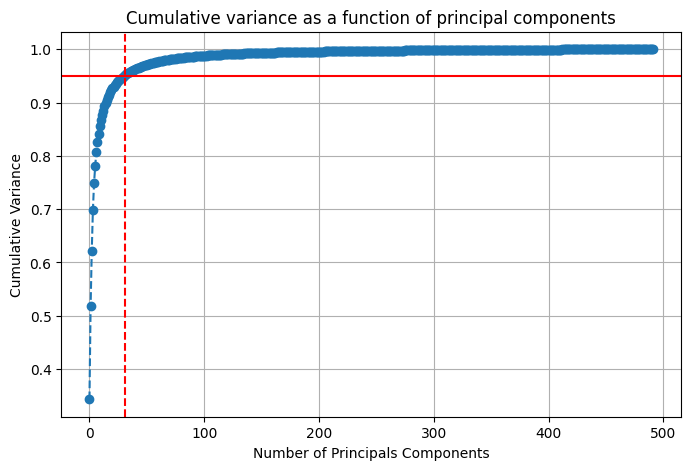

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principals Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative variance as a function of principal components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=num_components, color='r', linestyle='--')
plt.grid(True)
plt.show()

Applying PCA to images

In [24]:
pca_count = PCA(n_components=num_components)
reduced_images = pca_count.fit_transform(centered_images)

Reconstruction of images with the new number of components

In [25]:
reconstructed_images = pca_count.inverse_transform(reduced_images) + mean_image

Test with one specific image 

In [29]:
def reshape_image(flat_image, original_shape):
    return flat_image.reshape(original_shape)

image_path = './data/Sample/Apple Braeburn/0_100.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_shape = original_image.shape
flat_image = original_image.flatten()
centered_flat_image = flat_image - mean_image

Applying PCA to this image

In [30]:
reduced_flat_image = pca_count.transform([centered_flat_image])
reconstructed_flat_image = pca_count.inverse_transform(reduced_flat_image) + mean_image
simplified_image = reshape_image(reconstructed_flat_image[0], original_shape)

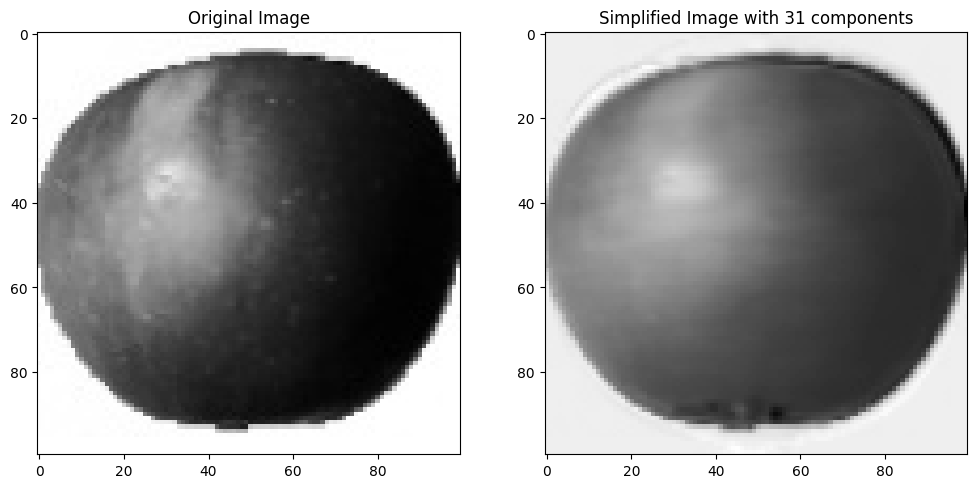

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f"Simplified Image with {num_components} components")
plt.imshow(simplified_image, cmap='gray')
plt.show()